## Extracción de datos

Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

Extracción de datos Excel

In [2]:
df = pd.read_excel('DatosT4.xlsx') # Lee el archivo Excel 'DatosT4.xlsx' y lo almacena en un DataFrame llamado 'df'
df2 = pd.read_excel('DatosT3.xlsx') # Lee el archivo Excel 'DatosT3.xlsx' y lo almacena en un DataFrame llamado 'df2'

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha']) # Convierte la columna 'Fecha' del DataFrame 'df' al tipo de dato datetime
df2['Fecha'] = pd.to_datetime(df2['Fecha'])  # Convierte la columna 'Fecha' del DataFrame 'df2' al tipo de dato datetime

In [4]:
df.head(3)
#este dataframe contiene los datos proyectados desde 2024-10-08 hasta 2038-12-30

,Fecha,IC Inferior 95%,IC Inferior 68%,Demanda,IC Superior 68%,IC Superior 95%,Solar,Eolica,Aportes
0,2024-10-08,216.16198,220.344643,225.451938,230.588036,234.798115,0.447,0.073454,115.88
1,2024-10-09,216.16198,220.344643,225.451938,230.588036,234.798115,0.441,0.076964,147.79
2,2024-10-10,216.16198,220.344643,225.451938,230.588036,234.798115,0.428,0.093008,132.29


In [5]:
df2.head(3)
#En este dataframe tenemos los daatos historicos desde 2020-08-07 hasta 2024-10-31

,Fecha,Solar,Hidraulica,Eolica,Aportes,Demanda
0,2020-08-07,0.447223,149.556873,0.073454,115.88,187.931174
1,2020-08-08,0.440522,141.094959,0.076964,147.79,189.196517
2,2020-08-09,0.428340,127.283621,0.093008,132.29,177.848896


Creo una funcion para que en el eje x de las graficas me muestre solo los años para una mejor visualizacion

In [6]:
def formato_ejex_anual(ax):
    years = mdates.YearLocator()  # Crea un localizador de ticks para los años
    years_fmt = mdates.DateFormatter('%Y') # Crea un formateador de ticks para mostrar los años en formato '%Y' (ej. 2023)
    ax.xaxis.set_major_locator(years) # Establece el localizador de ticks principales del eje x para mostrar solo los años
    ax.xaxis.set_major_formatter(years_fmt)  # Establece el formateador de ticks principales del eje x para mostrar los años en el formato especificado

## Descomposición Series de Tiempo

### Demanda

In [7]:
df2 = df2.set_index('Fecha')  # Establecer la columna 'Fecha' como índice para el análisis de series temporales
decomposition = seasonal_decompose(df2['Demanda'], model='additive', period=90, extrapolate_trend='freq')  # Descomponer 'Demanda' usando un modelo aditivo con un período de 90 días

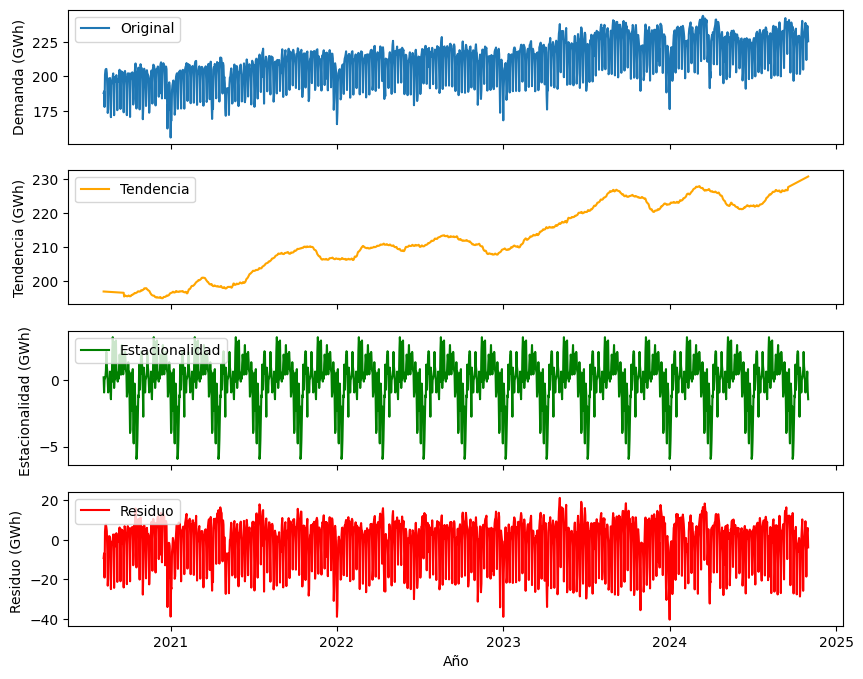

In [8]:
# Grafica la descomposición en tendencia, estacionalidad y residuo
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Serie original
ax1.plot(df2.index, df2['Demanda'], label='Original') # Graficar la serie temporal original 'Demanda'
ax1.set_ylabel('Demanda (GWh)') # Establecer la etiqueta del eje y como 'Demanda (GWh)'
ax1.legend(loc='upper left')  # Mostrar la leyenda en la esquina superior izquierda
formato_ejex_anual(ax1)  # Aplicar formato al eje x para mostrar solo los años

# Graficar la componente de tendencia
ax2.plot(decomposition.trend, label='Tendencia', color='orange')
ax2.set_ylabel('Tendencia (GWh)')
ax2.legend(loc='upper left')

# Graficar la componente de Estacionalidad
ax3.plot(decomposition.seasonal, label='Estacionalidad', color='green')
ax3.set_ylabel('Estacionalidad (GWh) ')
ax3.legend(loc='upper left')

# Graficar la componente residual (ruido)
ax4.plot(decomposition.resid, label='Residuo', color='red')
ax4.set_ylabel('Residuo (GWh) ')
ax4.legend(loc='upper left')

plt.xlabel('Año')
plt.show()

### Generación Solar

In [9]:
decomposition2 = seasonal_decompose(df2['Solar'], model='additive', period=60)

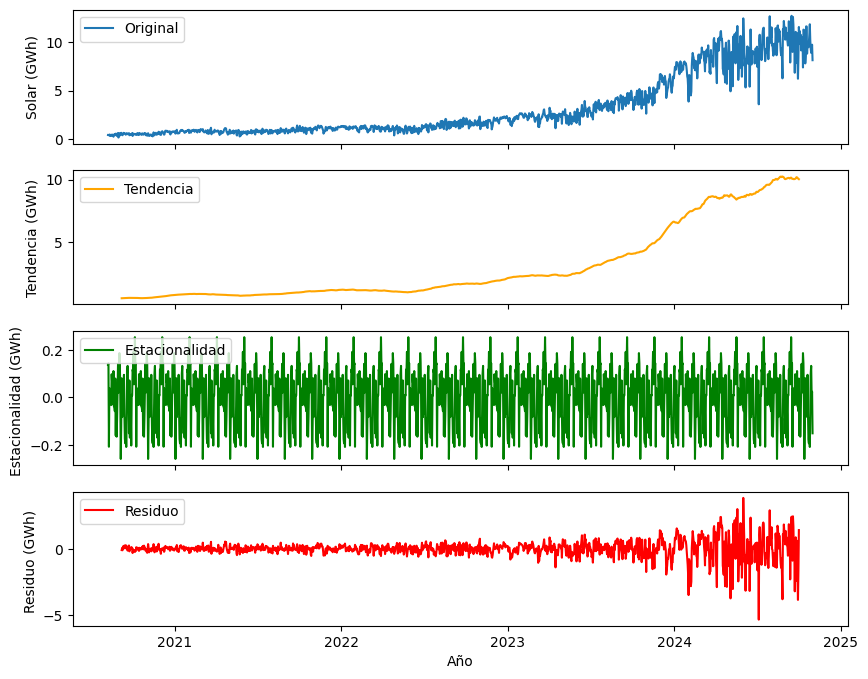

In [10]:
# Grafica la descomposición en tendencia, estacionalidad y residuo
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Serie original
ax1.plot(df2.index, df2['Solar'], label='Original') # Graficar la serie temporal original 'Demanda'
ax1.set_ylabel('Solar (GWh)') # Establecer la etiqueta del eje y como 'Demanda (GWh)'
ax1.legend(loc='upper left')  # Mostrar la leyenda en la esquina superior izquierda
formato_ejex_anual(ax1)  # Aplicar formato al eje x para mostrar solo los años

# Graficar la componente de tendencia
ax2.plot(decomposition2.trend, label='Tendencia', color='orange')
ax2.set_ylabel('Tendencia (GWh)')
ax2.legend(loc='upper left')

# Graficar la componente de Estacionalidad
ax3.plot(decomposition2.seasonal, label='Estacionalidad', color='green')
ax3.set_ylabel('Estacionalidad (GWh) ')
ax3.legend(loc='upper left')

# Graficar la componente residual (ruido)
ax4.plot(decomposition2.resid, label='Residuo', color='red')
ax4.set_ylabel('Residuo (GWh) ')
ax4.legend(loc='upper left')

plt.xlabel('Año')
plt.show()


### Generación Eolica

In [11]:
decomposition = seasonal_decompose(df2['Eolica'], model='additive', period=60)

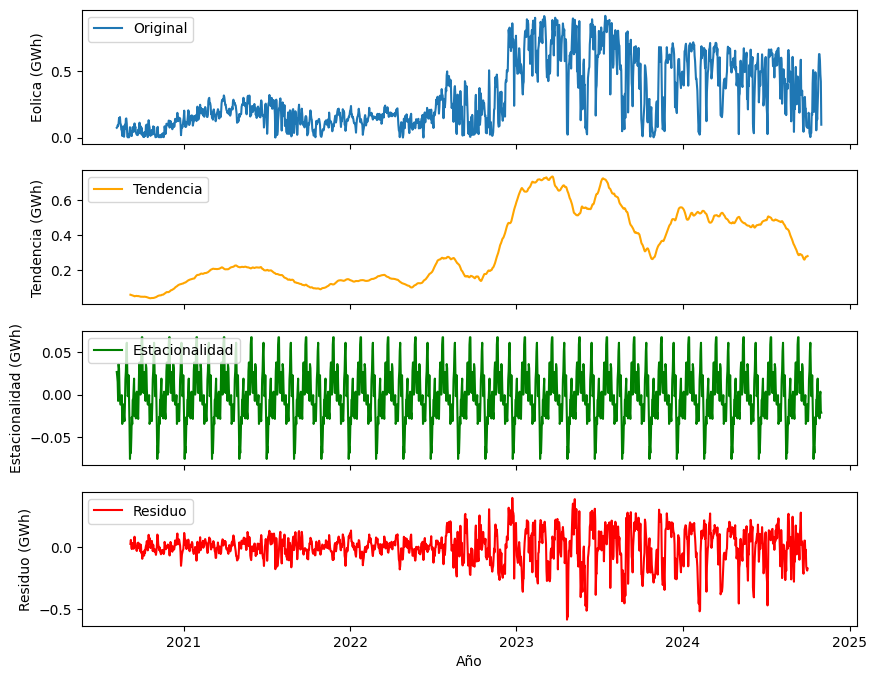

In [12]:
decomposition = seasonal_decompose(df2['Eolica'], model='additive', period=60)

# Grafica la descomposición en tendencia, estacionalidad y residuo
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Serie original
ax1.plot(df2.index, df2['Eolica'], label='Original')
ax1.set_ylabel('Eolica (GWh)')
ax1.legend(loc='upper left')
formato_ejex_anual(ax1)

# Tendencia
ax2.plot(decomposition.trend, label='Tendencia', color='orange')
ax2.set_ylabel('Tendencia (GWh)')
ax2.legend(loc='upper left')

# Estacionalidad
ax3.plot(decomposition.seasonal, label='Estacionalidad', color='green')
ax3.set_ylabel('Estacionalidad (GWh)')
ax3.legend(loc='upper left')

# Ruido (residuo)
ax4.plot(decomposition.resid, label='Residuo', color='red')
ax4.set_ylabel('Residuo (GWh)')
ax4.legend(loc='upper left')

plt.xlabel('Año')
plt.show()

### Aportes

In [13]:
# Realiza la descomposición de la serie temporal, asumiendo un modelo aditivo
decomposition = seasonal_decompose(df2['Aportes'], model='additive', period=90)

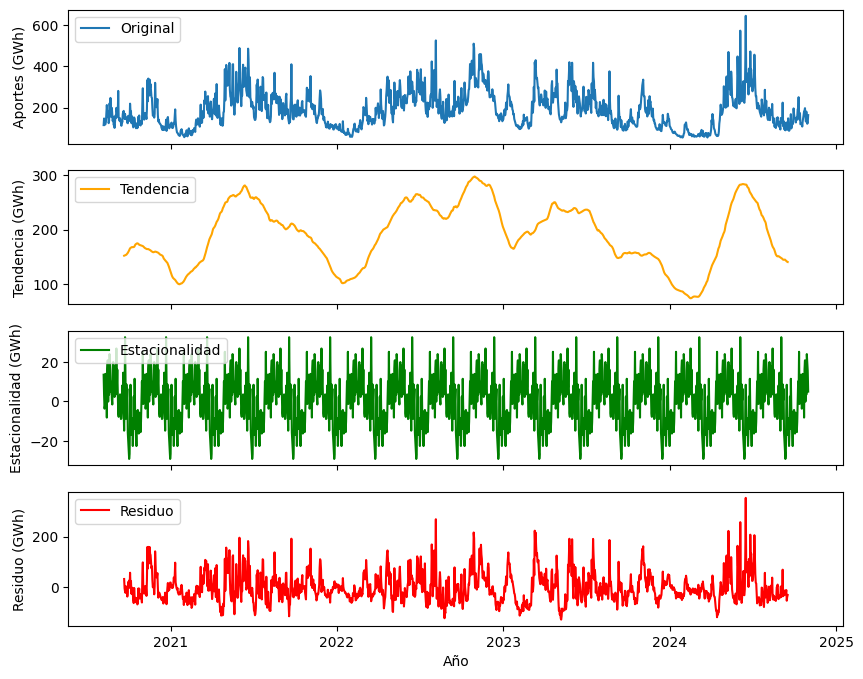

In [14]:
# Grafica la descomposición en tendencia, estacionalidad y residuo
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Serie original
ax1.plot(df2.index, df2['Aportes'], label='Original')
ax1.set_ylabel('Aportes (GWh)')
ax1.legend(loc='upper left')
formato_ejex_anual(ax1)

# Tendencia
ax2.plot(decomposition.trend, label='Tendencia', color='orange')
ax2.set_ylabel('Tendencia (GWh)')
ax2.legend(loc='upper left')

# Estacionalidad
ax3.plot(decomposition.seasonal, label='Estacionalidad', color='green')
ax3.set_ylabel('Estacionalidad (GWh)')
ax3.legend(loc='upper left')

# Ruido (residuo)
ax4.plot(decomposition.resid, label='Residuo', color='red')
ax4.set_ylabel('Residuo (GWh)')
ax4.legend(loc='upper left')

plt.xlabel('Año')
plt.show()

## Eliminación de la tendencia

In [16]:
from statsmodels.tsa.seasonal import STL
import numpy as np

In [17]:
# Descomposición STL para la columna 'Eolica'
stl_eolica = STL(df['Eolica'], period=60) # Se especifica un período de 60 dias
decomposition_eolica = stl_eolica.fit() # Ajusta el modelo STL a los datos de 'Eolica' y obtiene los resultados de la descomposición

# Descomposición STL para la columna 'Solar'
stl_solar = STL(df['Solar'], period=60)
decomposition_solar = stl_solar.fit()

In [18]:
# Obtener las series sin tendencia
# Crea una nueva columna 'Eolica_NT' en el DataFrame 'df'.
# Esta columna almacenará los valores de 'Eolica' sin la tendencia.
df['Eolica_NT'] = df['Eolica'] - decomposition_eolica.trend.interpolate(method='linear')
# Resta la componente de tendencia (interpolada) de la serie original 'Eolica'.
# decomposition_eolica.trend: Accede a la componente de tendencia obtenida por STL.
# .interpolate(method='linear'): Interpola valores faltantes en la tendencia usando interpolación lineal.
# El resultado de la resta se asigna a la nueva columna 'Eolica_NT'.


df['Solar_NT'] = df['Solar'] - decomposition_solar.trend.interpolate(method='linear')

In [19]:
df.head(3)

,Fecha,IC Inferior 95%,IC Inferior 68%,Demanda,IC Superior 68%,IC Superior 95%,Solar,Eolica,Aportes,Eolica_NT,Solar_NT
0,2024-10-08,216.16198,220.344643,225.451938,230.588036,234.798115,0.447,0.073454,115.88,0.003776,-0.029919
1,2024-10-09,216.16198,220.344643,225.451938,230.588036,234.798115,0.441,0.076964,147.79,0.007681,-0.037197
2,2024-10-10,216.16198,220.344643,225.451938,230.588036,234.798115,0.428,0.093008,132.29,0.024121,-0.051461


Eliminar los negativos de las nuevas series de solar y eolica que se generaron al quitar la tendencia

In [20]:
#modifico los datos para quitar los negativos de las columnas
df_nt = df.copy() # Crea una copia del DataFrame 'df' y la asigna a 'df_nt

min_eolica_nt = df_nt['Eolica_NT'].min() # Encuentra el valor mínimo en la columna 'Eolica_NT'
min_solar_nt = df_nt['Solar_NT'].min() # Encuentra el valor mínimo en la columna 'Solar_NT'
shift_value = 1e-6 #adicional le sumo un pequeño numero para asegurarme que no sea cero

df_nt['Eolica_NT'] = df_nt['Eolica_NT'] + shift_value + abs(df_nt['Eolica_NT'].min())
# Desplaza los valores para que sean positivos
# Se suma el valor absoluto del mínimo para asegurar que todos los valores sean >= shift_value
df_nt['Solar_NT'] = df_nt['Solar_NT'] + shift_value + abs(df_nt['Solar_NT'].min())

In [21]:
#para que me cuente si hay ceros o negativos
mascara = df_nt['Eolica_NT'] <= 0 # Crea una máscara booleana donde 'True' indica valores menores o iguales a 0 en 'Eolica_NT'
num_zeros_negatives = mascara.sum() # Suma los valores 'True' en la máscara para contar ceros y negativos
# Imprime el número de ceros y negativos en 'Eolica_NT'
print(f"Number of zeros or negative values in 'Eolica_NT': {num_zeros_negatives}")

mascara = df_nt['Solar_NT'] <= 0
num_zeros_negatives = mascara.sum()
print(f"Number of zeros or negative values in 'Solar_NT': {num_zeros_negatives}")

Number of zeros or negative values in 'Eolica_NT': 0
Number of zeros or negative values in 'Solar_NT': 0


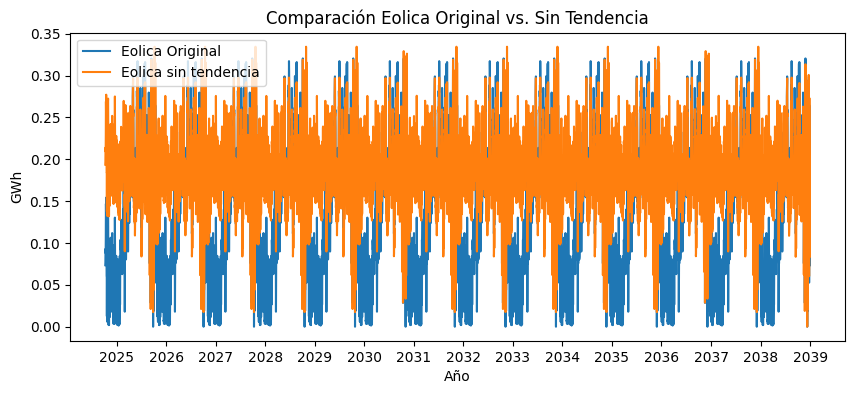

In [22]:
plt.figure(figsize=(10, 4))

plt.plot(df_nt['Fecha'], df_nt['Eolica'], label='Eolica Original')
plt.plot(df_nt['Fecha'], df_nt['Eolica_NT'], label='Eolica sin tendencia')

ax1 = plt.gca()
formato_ejex_anual(ax1)

plt.xlabel('Año')
plt.ylabel('GWh')
plt.title('Comparación Eolica Original vs. Sin Tendencia')
plt.legend()

plt.show()

# Optimización

## Definición de la función Objetivo

Definir la función objetivo se saca el costo del LCOE

In [29]:
def objetivo(xy):
    X, Y = xy
    return X * 89729000 + Y * 120525000

Definición condiciones iniciales

In [30]:
capacidad_maxima_embalse = 10000
nivel_inicial = 700
nivel_posgen = nivel_inicial

In [31]:
#Creo un nuevo dataframe para ir almacenando los resultados
df_calculos = df_nt[['Fecha']].copy()

df_calculos['Nivel'] = pd.Series(dtype=float)
df_calculos['Vertimientos'] = pd.Series(dtype=float)
df_calculos['gen_hidro'] = pd.Series(dtype=float)
df_calculos['Demanda_Insatisfecha'] = pd.Series(dtype=float)

df_calculos.loc[0, 'Nivel'] = nivel_inicial

## Definición Restricciones

In [32]:
def restricciones(xy, gen_solar, gen_eolica, aportes, demanda, nivel_anterior, capacidad_maxima):
        global nivel_posgen # Declare nivel_posgen as global
        X, Y = xy
        nivel_potencial = nivel_posgen + aportes#Lo que quedo menos lo que llego cuanto es
        vertimiento = max(0, nivel_potencial - capacidad_maxima) #calcula el vertimiento cuando se excede la capacidad
        nivel_actual = nivel_potencial-vertimiento#Lo que realmnete hay en el emblase es el nivel actual
         # Calcula el nivel del embalse considerando el vertimiento
        gen_hidro = max(min(demanda - (gen_solar + gen_eolica), nivel_actual,294),0)  # Calcula gen_hidro
        demanda_insatisfecha = max(0, demanda - (X * gen_solar + Y * gen_eolica + gen_hidro))
        nivel_posgen = nivel_actual- gen_hidro
        # El total de energía generada debe ser mayor a la demanda
        restriccion_1 = X * gen_solar + Y * gen_eolica + gen_hidro - demanda
        # La demanda debe ser mayor
        restriccion_2 = demanda - (X * gen_solar + Y * gen_eolica)

        return [restriccion_1, restriccion_2, nivel_actual, gen_hidro, vertimiento, demanda_insatisfecha]  # Retorna nivel_actual, gen_hidro y vertimiento

for index, row in df_nt.iterrows():
    # Definir límites y condiciones iniciales
    limites = [(1, None), (1, None)]  # Multiplicadores no pueden ser menores a 1
    x0 = [1, 1]  # Valores iniciales

# Crear listas para almacenar los resultados
resultados = []

## Ejecución Modelo Optimización

Ejecución optimización para buscar mejor combinación de fuentes para cada uno de los timpos t. Simultaneamente segun el resultado de cada optimización se simula el nivel

In [33]:
from scipy.optimize import minimize

In [34]:
def hessian_zero(x):
  return np.zeros((2, 2))

resultado = []
nivel_anterior = nivel_inicial
for i in range(len(df_nt)):
        res = minimize(objetivo,
                       x0=(1, 1),
                       constraints=[{'type': 'ineq', 'fun': lambda xy: restricciones(xy, df_nt['Solar_NT'][i], df_nt['Eolica_NT'][i], df_nt['Aportes'][i], df_nt['Demanda'][i], nivel_anterior, 150)[:2]}],
                       bounds=limites,
                       method='trust-constr',
                       hess=hessian_zero)
        resultado.append(res)
        nivel_actual, gen_hidro_actual, vertimiento, demanda_insatisfecha_actual = restricciones(res.x, df_nt['Solar'][i], df_nt['Eolica'][i], df_nt['Aportes'][i], df_nt['Demanda'][i], nivel_anterior, 150)[2:]
        df_calculos.loc[i, 'Nivel'] = nivel_actual  # Actualiza el nivel del embalse en el dataframe
        df_calculos.loc[i, 'gen_hidro'] = gen_hidro_actual # guarda la generación hidro
        df_calculos.loc[i, 'Vertimientos'] = vertimiento
        nivel_anterior = nivel_actual
        df_calculos.loc[i, 'Demanda_Insatisfecha'] = demanda_insatisfecha_actual # Guarda la demanda insatisfecha en el DataFrame

c:\Users\josal\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
c:\Users\josal\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
c:\Users\josal\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by de

Df con los multiplicadores mas optimos para cada uno de los tiempos t y el calculo de los vertimientos

In [35]:
df_calculos

,Fecha,Nivel,Vertimientos,gen_hidro,Demanda_Insatisfecha
0,2024-10-08,115.88,0.0,115.88,49.530177
1,2024-10-09,147.79,0.0,147.79,35.306611
2,2024-10-10,132.29,0.0,132.29,42.950661
3,2024-10-11,117.98,0.0,117.98,45.452049
4,2024-10-12,120.19,0.0,120.19,52.370441
...,...,...,...,...,...
5118,2038-12-26,146.06,0.0,146.06,0.000000
5119,2038-12-27,141.27,0.0,141.27,4.918915
5120,2038-12-28,129.85,0.0,129.85,6.472895
5121,2038-12-29,133.95,0.0,133.95,8.708219


Grafica con la serie de tiempo del nivel, el comportamiento de vartimientos y el nivel de la presa

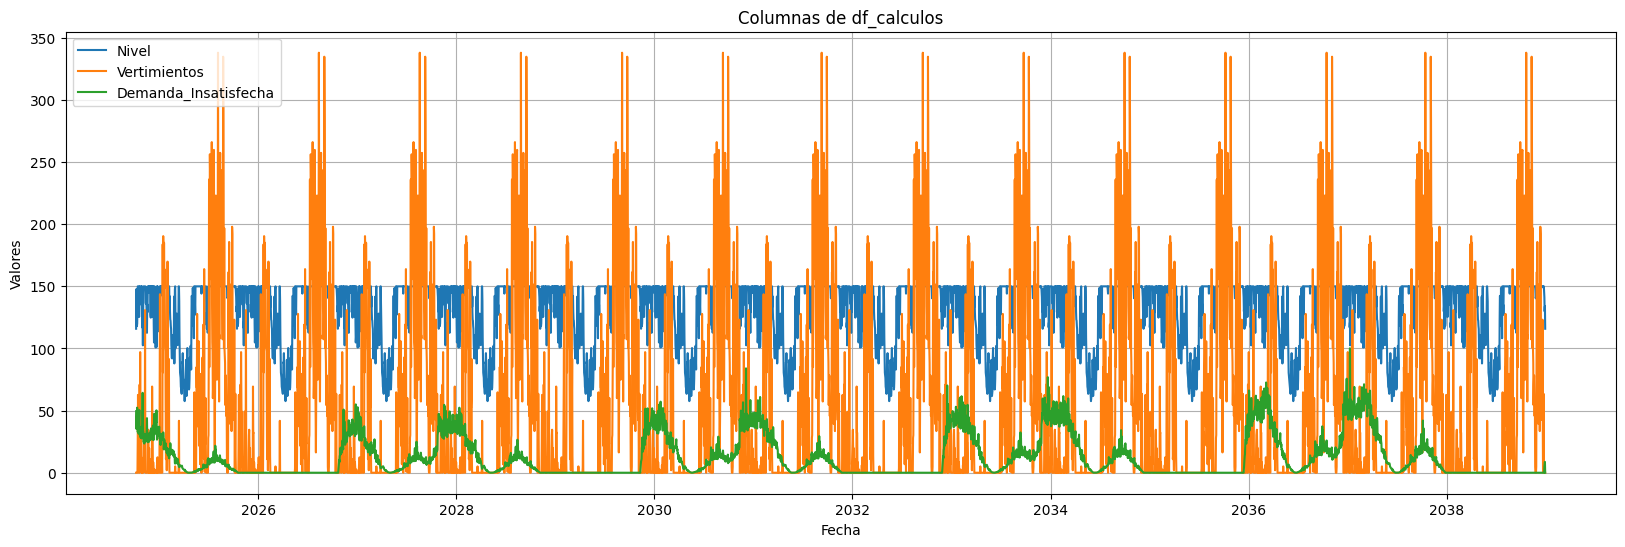

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))  # Ajusta el tamaño de la figura si es necesario

# Graficar cada columna
ax.plot(df_calculos['Fecha'], df_calculos['Nivel'], label='Nivel')
ax.plot(df_calculos['Fecha'], df_calculos['Vertimientos'], label='Vertimientos')
#ax.plot(df_calculos['Fecha'], df_calculos['gen_hidro'], label='gen_hidro')
ax.plot(df_calculos['Fecha'], df_calculos['Demanda_Insatisfecha'], label='Demanda_Insatisfecha')

# Personalizar la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Columnas de df_calculos')
ax.legend()  # Mostrar leyenda
ax.grid(True)  # Mostrar cuadrícula

# Mostrar la gráfica
plt.show()

Almacenamiento de los multiplicadores

In [37]:
# Almacenar los resultados
#verificar los datos que almacena el resultado
for index, row in df_nt.iterrows():
  if resultado[index].success:
          resultados.append({
              'Fecha': row['Fecha'],
              'Multiplicador X': resultado[index].x[0],
              'Multiplicador Y': resultado[index].x[1]
          })
  else:
          print(f"Error en la optimización para la fecha {row['Fecha']}: {resultado.message}")
          resultados.append({
              'Fecha': row['Fecha'],
              'Multiplicador X': None,
              'Multiplicador Y': None
          })

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)
resultados_df.reset_index(drop=True, inplace=True)

# Mostrar resultados
resultados_df

,Fecha,Multiplicador X,Multiplicador Y
0,2024-10-08,134.157288,1.000000
1,2024-10-09,95.869305,1.000000
2,2024-10-10,117.098759,1.000000
3,2024-10-11,124.361457,1.000000
4,2024-10-12,143.827665,1.000000
...,...,...,...
5118,2038-12-26,112.304776,1.000000
5119,2038-12-27,1.000000,612.200006
5120,2038-12-28,1.000000,743.989978
5121,2038-12-29,1.000000,930.491659


In [38]:
resultados_df = resultados_df[(resultados_df['Multiplicador X'] <= 1500) & (resultados_df['Multiplicador Y'] <= 400)]

In [39]:
# Obtener los índices del mínimo y máximo
indice_minimo = resultados_df['Multiplicador Y'].idxmin()
indice_maximo = resultados_df['Multiplicador Y'].idxmax()

# Eliminar las filas correspondientes
resultados_df = resultados_df[(resultados_df.index != indice_minimo) & (resultados_df.index != indice_maximo)]

# Restablecer el índice (opcional)
resultados_df.reset_index(drop=True, inplace=True)

## Grafica de la serie de tiempo de los multiplicadores

### Multiplicador Solar

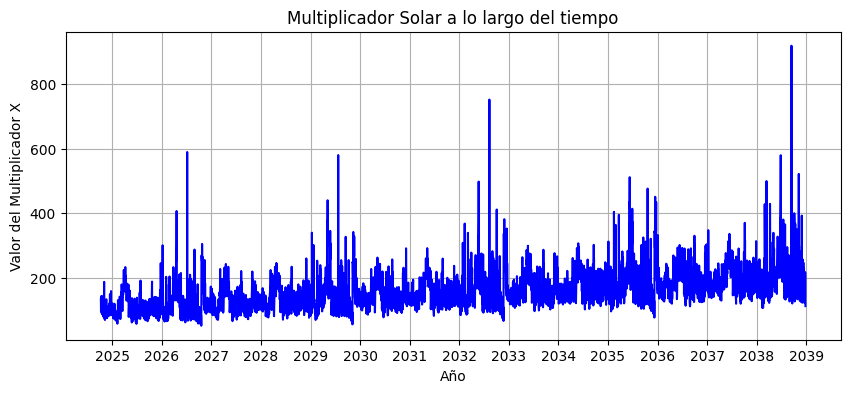

In [40]:
plt.figure(figsize=(10, 4))  # Ajusta el tamaño de la figura si es necesario
plt.plot(resultados_df['Fecha'], resultados_df['Multiplicador X'], label='Multiplicador X', color='blue')
plt.xlabel('Año')
plt.ylabel('Valor del Multiplicador X')
plt.title('Multiplicador Solar a lo largo del tiempo')

# Formato del eje x para mostrar solo los años
ax1 = plt.gca()
formato_ejex_anual(ax1)

plt.grid(True)
plt.show()

### Multiplicador Eolico

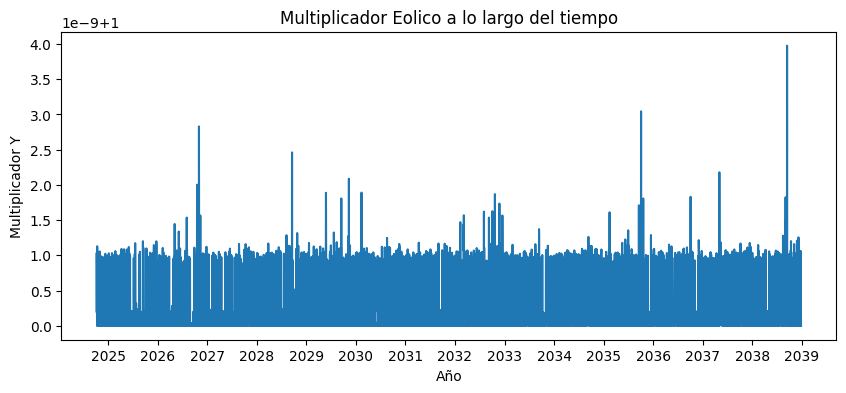

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(resultados_df['Fecha'], resultados_df['Multiplicador Y'])

ax1 = plt.gca()
formato_ejex_anual(ax1)

plt.xlabel('Año')
plt.ylabel('Multiplicador Y')
plt.title('Multiplicador Eolico a lo largo del tiempo')

plt.show()

## Control Calidad Variables

Calculo de la generacion total Solar + Eolica con los multiplicadores

In [42]:
df_nt['Gen Solar Multiplicada'] = df_nt['Solar_NT'] * resultados_df['Multiplicador X']
df_nt['Gen Eolica Multiplicada'] = df_nt['Eolica_NT'] * resultados_df['Multiplicador Y']
df_nt['Gen Total con Multiplicadores'] = df_nt['Gen Solar Multiplicada'] + df_nt['Gen Eolica Multiplicada']
df_nt

,Fecha,IC Inferior 95%,IC Inferior 68%,Demanda,IC Superior 68%,IC Superior 95%,Solar,Eolica,Aportes,Eolica_NT,Solar_NT,Gen Solar Multiplicada,Gen Eolica Multiplicada,Gen Total con Multiplicadores
0,2024-10-08,216.161980,220.344643,225.451938,230.588036,234.798115,0.447,0.073454,115.88,0.193592,0.815299,109.378346,0.193592,109.571938
1,2024-10-09,216.161980,220.344643,225.451938,230.588036,234.798115,0.441,0.076964,147.79,0.197498,0.808021,77.464441,0.197498,77.661938
2,2024-10-10,216.161980,220.344643,225.451938,230.588036,234.798115,0.428,0.093008,132.29,0.213937,0.793757,92.948001,0.213937,93.161938
3,2024-10-11,216.161980,220.344643,225.451938,230.588036,234.798115,0.498,0.087883,117.98,0.209208,0.862508,107.262730,0.209208,107.471938
4,2024-10-12,216.161980,220.344643,225.451938,230.588036,234.798115,0.367,0.106744,120.19,0.228466,0.730273,105.033472,0.228466,105.261938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,253.617252,278.090932,308.516228,339.778510,365.049966,1.863,0.216441,146.06,0.224617,1.444566,NaN,NaN,NaN
5119,2038-12-27,253.617252,278.090932,308.516228,339.778510,365.049966,0.447,0.264424,141.27,0.273147,0.025356,NaN,NaN,NaN
5120,2038-12-28,253.617252,278.090932,308.516228,339.778510,365.049966,0.441,0.230853,129.85,0.240124,0.016168,NaN,NaN,NaN
5121,2038-12-29,253.617252,278.090932,308.516228,339.778510,365.049966,0.428,0.177788,133.95,0.187606,0.000001,NaN,NaN,NaN


In [43]:
#verifico que no hallan Nan en los resultados
nan_in_gen_solar = df_nt['Gen Solar Multiplicada'].isna().any()
nan_in_gen_eolica = df_nt['Gen Eolica Multiplicada'].isna().any()
nan_in_gen_total = df_nt['Gen Total con Multiplicadores'].isna().any()

print(f"NaNs in 'Gen Solar Multiplicada': {nan_in_gen_solar}")
print(f"NaNs in 'Gen Eolica Multiplicada': {nan_in_gen_eolica}")
print(f"NaNs in 'Gen Total con Multiplicadores': {nan_in_gen_total}")

NaNs in 'Gen Solar Multiplicada': True
NaNs in 'Gen Eolica Multiplicada': True
NaNs in 'Gen Total con Multiplicadores': True


# Simulación con multiplicadores

## Simulación Máximo Multiplicadores

Los primero multiplicadores con los que se experimenó fue con los valores máximos de los multiplicadores escogidos

In [45]:
# Encontrar el valor máximo y el índice de la fila
max_index = df_nt['Gen Total con Multiplicadores'].idxmax()
min_index = df_nt['Gen Total con Multiplicadores'].idxmin()

In [46]:
max_multiplicador_x = resultados_df.loc[max_index, 'Multiplicador X']
max_multiplicador_y = resultados_df.loc[max_index, 'Multiplicador Y']
min_multiplicador_x = resultados_df.loc[min_index, 'Multiplicador X']
min_multiplicador_y = resultados_df.loc[min_index, 'Multiplicador Y']

In [47]:
print(f"Maximo 'Gen Total con Multiplicadores': {df_nt.loc[max_index, 'Gen Total con Multiplicadores']}")
print(f"Multiplicador X para el maximo: {max_multiplicador_x}")
print(f"Multiplicador Y para el maximo: {max_multiplicador_y}")

print(f"Minimum 'Gen Total con Multiplicadores': {df_nt.loc[min_index, 'Gen Total con Multiplicadores']}")
print(f"Multiplicador X para el minimo: {min_multiplicador_x}")
print(f"Multiplicador Y para el minimo: {min_multiplicador_y}")

Maximo 'Gen Total con Multiplicadores': 869.8869366021938
Multiplicador X para el maximo: 918.7374803904562
Multiplicador Y para el maximo: 1.0000000039762686
Minimum 'Gen Total con Multiplicadores': 37.22873809444347
Multiplicador X para el minimo: 181.54482437478939
Multiplicador Y para el minimo: 1.0000000010121566


Simular con los multiplicadores hallados

In [48]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
df_constantes = df_nt.copy()
df_constantes

,Fecha,IC Inferior 95%,IC Inferior 68%,Demanda,IC Superior 68%,IC Superior 95%,Solar,Eolica,Aportes,Eolica_NT,Solar_NT,Gen Solar Multiplicada,Gen Eolica Multiplicada,Gen Total con Multiplicadores
0,2024-10-08,216.161980,220.344643,225.451938,230.588036,234.798115,0.447,0.073454,115.88,0.193592,0.815299,109.378346,0.193592,109.571938
1,2024-10-09,216.161980,220.344643,225.451938,230.588036,234.798115,0.441,0.076964,147.79,0.197498,0.808021,77.464441,0.197498,77.661938
2,2024-10-10,216.161980,220.344643,225.451938,230.588036,234.798115,0.428,0.093008,132.29,0.213937,0.793757,92.948001,0.213937,93.161938
3,2024-10-11,216.161980,220.344643,225.451938,230.588036,234.798115,0.498,0.087883,117.98,0.209208,0.862508,107.262730,0.209208,107.471938
4,2024-10-12,216.161980,220.344643,225.451938,230.588036,234.798115,0.367,0.106744,120.19,0.228466,0.730273,105.033472,0.228466,105.261938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,253.617252,278.090932,308.516228,339.778510,365.049966,1.863,0.216441,146.06,0.224617,1.444566,NaN,NaN,NaN
5119,2038-12-27,253.617252,278.090932,308.516228,339.778510,365.049966,0.447,0.264424,141.27,0.273147,0.025356,NaN,NaN,NaN
5120,2038-12-28,253.617252,278.090932,308.516228,339.778510,365.049966,0.441,0.230853,129.85,0.240124,0.016168,NaN,NaN,NaN
5121,2038-12-29,253.617252,278.090932,308.516228,339.778510,365.049966,0.428,0.177788,133.95,0.187606,0.000001,NaN,NaN,NaN


In [50]:
# Define los multiplicadores constantes
x = max_multiplicador_x
y = max_multiplicador_y

In [51]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
# Ensure 'Solar_NT' and 'Eolica_NT' and 'Demanda' columns are included
df_constantes = df_nt[['Fecha', 'Solar', 'Eolica', 'Solar_NT', 'Eolica_NT', 'Aportes', 'Demanda']].copy()


df_constantes['Solar_multiplicada'] = df_nt['Solar_NT'] * x
df_constantes['Eolica_multiplicada'] = df_nt['Eolica_NT'] * y
df_constantes.head(3)

,Fecha,Solar,Eolica,Solar_NT,Eolica_NT,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada
0,2024-10-08,0.447,0.073454,0.815299,0.193592,115.88,225.451938,749.046044,0.193592
1,2024-10-09,0.441,0.076964,0.808021,0.197498,147.79,225.451938,742.359451,0.197498
2,2024-10-10,0.428,0.093008,0.793757,0.213937,132.29,225.451938,729.254630,0.213937


In [52]:
capacidad_maxima_embalse_1 = capacidad_maxima_embalse
nivel_inicial = 700
nivel_anterior = nivel_inicial

In [53]:
# Itera sobre las filas de df_constantes para calcular los valores
for i in range(len(df_constantes)):
    # Calcula el nivel potencial
    nivel_potencial = nivel_anterior + df_constantes.loc[i, 'Aportes']

    # Calcula el vertimiento si el nivel potencial supera la capacidad máxima
    df_constantes.loc[i, 'vertimiento'] = max(0, nivel_potencial - capacidad_maxima_embalse)

    # Calcula el nivel actual, teniendo en cuenta el vertimiento
    df_constantes.loc[i, 'nivel'] = nivel_potencial - df_constantes.loc[i, 'vertimiento']

   # Calcula la demanda restante después de la generación solar y eólica
    demanda_restante = df_constantes.loc[i, 'Demanda'] - (df_constantes.loc[i, 'Solar_multiplicada'] + df_constantes.loc[i, 'Eolica_multiplicada'])

    # Calcula gen_hidro, limitada por el nivel actual y la demanda restante
    df_constantes.loc[i, 'gen_hidro'] = max(min(demanda_restante, df_constantes.loc[i, 'nivel'],294),0)

    # Calcula demanda_insatisfecha
    df_constantes.loc[i, 'demanda_insatisfecha'] = max(0, demanda_restante - df_constantes.loc[i, 'gen_hidro'])

    # Actualiza nivel_anterior para la siguiente iteración
    nivel_anterior = df_constantes.loc[i, 'nivel']-df_constantes.loc[i, 'gen_hidro']

df_constantes


,Fecha,Solar,Eolica,Solar_NT,Eolica_NT,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada,vertimiento,nivel,gen_hidro,demanda_insatisfecha
0,2024-10-08,0.447,0.073454,0.815299,0.193592,115.88,225.451938,749.046044,0.193592,0.00,815.880000,0.000000,0.000000
1,2024-10-09,0.441,0.076964,0.808021,0.197498,147.79,225.451938,742.359451,0.197498,0.00,963.670000,0.000000,0.000000
2,2024-10-10,0.428,0.093008,0.793757,0.213937,132.29,225.451938,729.254630,0.213937,0.00,1095.960000,0.000000,0.000000
3,2024-10-11,0.498,0.087883,0.862508,0.209208,117.98,225.451938,792.418267,0.209208,0.00,1213.940000,0.000000,0.000000
4,2024-10-12,0.367,0.106744,0.730273,0.228466,120.19,225.451938,670.929249,0.228466,0.00,1334.130000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,1.863,0.216441,1.444566,0.224617,146.06,308.516228,1327.176523,0.224617,146.06,10000.000000,0.000000,0.000000
5119,2038-12-27,0.447,0.264424,0.025356,0.273147,141.27,308.516228,23.295740,0.273147,141.27,10000.000000,284.947341,0.000000
5120,2038-12-28,0.441,0.230853,0.016168,0.240124,129.85,308.516228,14.853945,0.240124,0.00,9844.902659,293.422159,0.000000
5121,2038-12-29,0.428,0.177788,0.000001,0.187606,133.95,308.516228,0.000919,0.187606,0.00,9685.430500,294.000000,14.327703


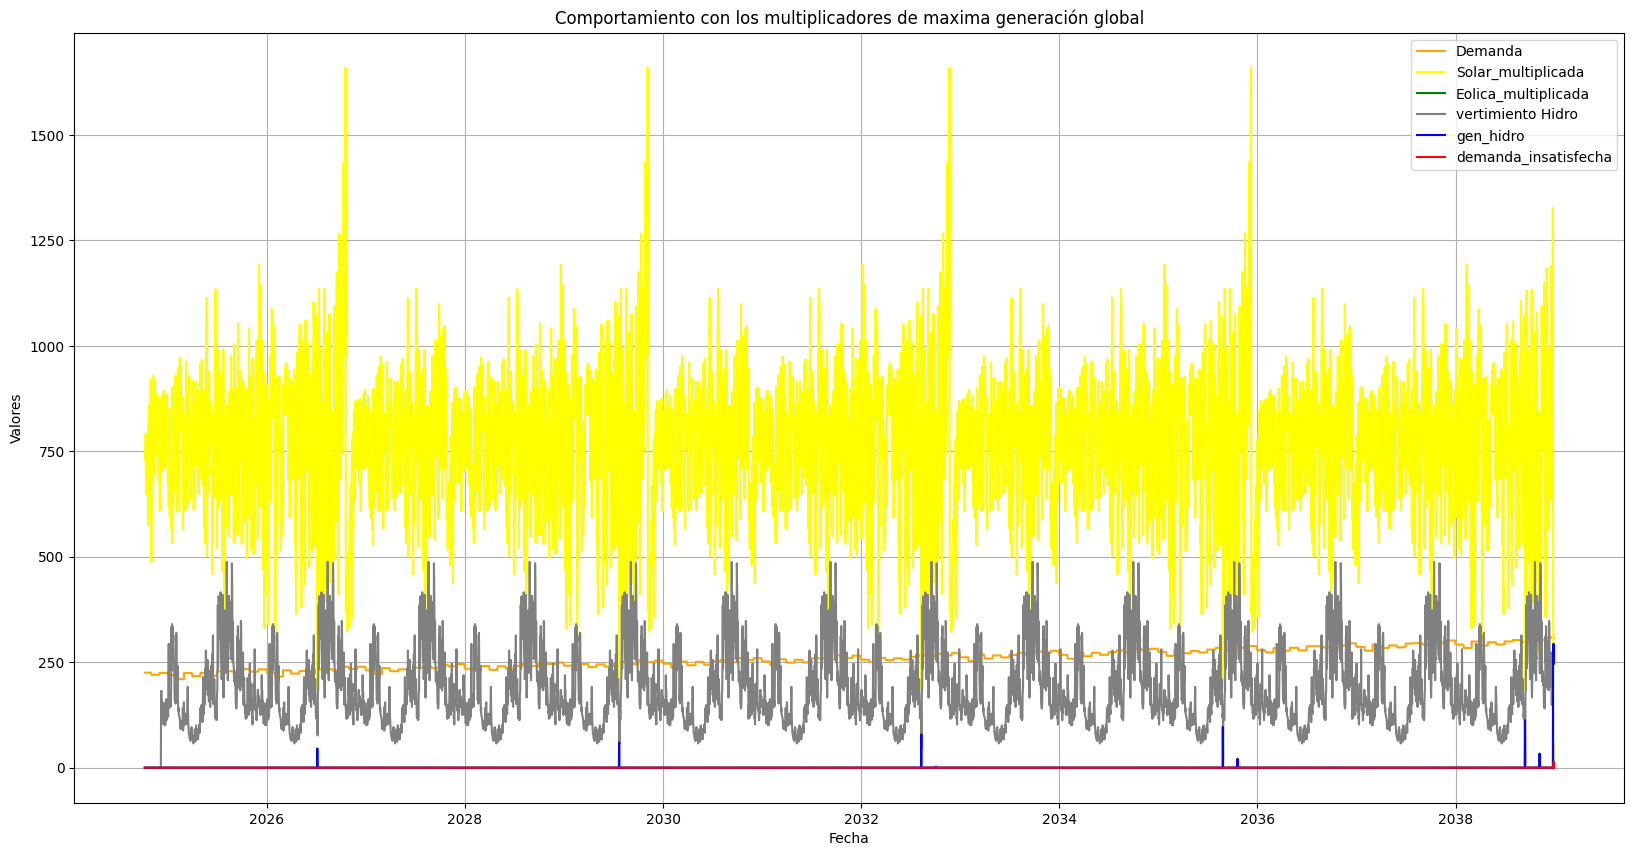

In [54]:

plt.figure(figsize=(20, 10))

plt.plot(df_constantes['Fecha'], df_constantes['Demanda'], label='Demanda', color='orange')
plt.plot(df_constantes['Fecha'], df_constantes['Solar_multiplicada'], label='Solar_multiplicada', color='yellow')
plt.plot(df_constantes['Fecha'], df_constantes['Eolica_multiplicada'], label='Eolica_multiplicada', color='green')
plt.plot(df_constantes['Fecha'], df_constantes['vertimiento'], label='vertimiento Hidro', color='gray')
plt.plot(df_constantes['Fecha'], df_constantes['gen_hidro'], label='gen_hidro', color='blue')
plt.plot(df_constantes['Fecha'], df_constantes['demanda_insatisfecha'], label='demanda_insatisfecha', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Comportamiento con los multiplicadores de maxima generación global')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

Se puede observar que hay condiciones en diaspuntuales compolejos en terminos de recusrsos, por esto es que se generan tantos excedentes por tanto vertimientos

## Simulación con la media

Se buca una condicion equilibrada considerando los costso que implicaba el costo

In [55]:
mean_multiplicador_x=resultados_df['Multiplicador X'].mean()
mean_multiplicador_y=resultados_df['Multiplicador Y'].mean()

In [56]:
print(f"Media de X: {mean_multiplicador_x}")
print(f"Media de Y: {mean_multiplicador_y}")

Media de X: 155.61599021847354
Media de Y: 1.0000000002405578


In [57]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
df_constantes = df.copy()
df_constantes

,Fecha,IC Inferior 95%,IC Inferior 68%,Demanda,IC Superior 68%,IC Superior 95%,Solar,Eolica,Aportes,Eolica_NT,Solar_NT
0,2024-10-08,216.161980,220.344643,225.451938,230.588036,234.798115,0.447,0.073454,115.88,0.003776,-0.029919
1,2024-10-09,216.161980,220.344643,225.451938,230.588036,234.798115,0.441,0.076964,147.79,0.007681,-0.037197
2,2024-10-10,216.161980,220.344643,225.451938,230.588036,234.798115,0.428,0.093008,132.29,0.024121,-0.051461
3,2024-10-11,216.161980,220.344643,225.451938,230.588036,234.798115,0.498,0.087883,117.98,0.019392,0.017290
4,2024-10-12,216.161980,220.344643,225.451938,230.588036,234.798115,0.367,0.106744,120.19,0.038649,-0.114945
...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,253.617252,278.090932,308.516228,339.778510,365.049966,1.863,0.216441,146.06,0.034800,0.599348
5119,2038-12-27,253.617252,278.090932,308.516228,339.778510,365.049966,0.447,0.264424,141.27,0.083331,-0.819862
5120,2038-12-28,253.617252,278.090932,308.516228,339.778510,365.049966,0.441,0.230853,129.85,0.050308,-0.829050
5121,2038-12-29,253.617252,278.090932,308.516228,339.778510,365.049966,0.428,0.177788,133.95,-0.002210,-0.845217


In [58]:
# Define los multiplicadores constantes
x = mean_multiplicador_x
y = mean_multiplicador_y

In [59]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
# Ensure 'Solar_NT' and 'Eolica_NT' and 'Demanda' columns are included
df_constantes = df_nt[['Fecha', 'Solar', 'Eolica', 'Solar_NT', 'Eolica_NT', 'Aportes', 'Demanda']].copy()


df_constantes['Solar_multiplicada'] = df_nt['Solar_NT'] * x
df_constantes['Eolica_multiplicada'] = df_nt['Eolica_NT'] * y
df_constantes.head(3)

,Fecha,Solar,Eolica,Solar_NT,Eolica_NT,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada
0,2024-10-08,0.447,0.073454,0.815299,0.193592,115.88,225.451938,126.873611,0.193592
1,2024-10-09,0.441,0.076964,0.808021,0.197498,147.79,225.451938,125.741034,0.197498
2,2024-10-10,0.428,0.093008,0.793757,0.213937,132.29,225.451938,123.521336,0.213937


In [61]:
capacidad_maxima_embalse_1 = capacidad_maxima_embalse
nivel_anterior = nivel_inicial

In [62]:
df_constantes['nivel'] = 0
df_constantes['vertimiento'] = 0
df_constantes['gen_hidro'] = 0
df_constantes['demanda_insatisfecha'] = 0

In [63]:
# Itera sobre las filas de df_constantes para calcular los valores
for i in range(len(df_constantes)):
    # Calcula el nivel potencial
    nivel_potencial = nivel_anterior + df_constantes.loc[i, 'Aportes']

    # Calcula el vertimiento si el nivel potencial supera la capacidad máxima
    df_constantes.loc[i, 'vertimiento'] = max(0, nivel_potencial - capacidad_maxima_embalse)

    # Calcula el nivel actual, teniendo en cuenta el vertimiento
    df_constantes.loc[i, 'nivel'] = nivel_potencial - df_constantes.loc[i, 'vertimiento']

   # Calcula la demanda restante después de la generación solar y eólica
    demanda_restante = df_constantes.loc[i, 'Demanda'] - (df_constantes.loc[i, 'Solar_multiplicada'] + df_constantes.loc[i, 'Eolica_multiplicada'])

    # Calcula gen_hidro, limitada por el nivel actual y la demanda restante
    df_constantes.loc[i, 'gen_hidro'] = max(min(demanda_restante, df_constantes.loc[i, 'nivel'],294),0)

    # Calcula demanda_insatisfecha
    df_constantes.loc[i, 'demanda_insatisfecha'] = max(0, demanda_restante - df_constantes.loc[i, 'gen_hidro'])

    # Actualiza nivel_anterior para la siguiente iteración
    nivel_anterior = df_constantes.loc[i, 'nivel']-df_constantes.loc[i, 'gen_hidro']

df_constantes


C:\Users\josal\AppData\Local\Temp\ipykernel_16036\1773094211.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '815.88' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_constantes.loc[i, 'nivel'] = nivel_potencial - df_constantes.loc[i, 'vertimiento']
C:\Users\josal\AppData\Local\Temp\ipykernel_16036\1773094211.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.38473482823153' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_constantes.loc[i, 'gen_hidro'] = max(min(demanda_restante, df_constantes.loc[i, 'nivel'],294),0)
C:\Users\josal\AppData\Local\Temp\ipykernel_16036\1773094211.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.16273689917216'

,Fecha,Solar,Eolica,Solar_NT,Eolica_NT,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada,nivel,vertimiento,gen_hidro,demanda_insatisfecha
0,2024-10-08,0.447,0.073454,0.815299,0.193592,115.88,225.451938,126.873611,0.193592,815.880000,0.0,98.384735,0.000000
1,2024-10-09,0.441,0.076964,0.808021,0.197498,147.79,225.451938,125.741034,0.197498,865.285265,0.0,99.513406,0.000000
2,2024-10-10,0.428,0.093008,0.793757,0.213937,132.29,225.451938,123.521336,0.213937,898.061859,0.0,101.716665,0.000000
3,2024-10-11,0.498,0.087883,0.862508,0.209208,117.98,225.451938,134.220009,0.209208,914.325194,0.0,91.022720,0.000000
4,2024-10-12,0.367,0.106744,0.730273,0.228466,120.19,225.451938,113.642168,0.228466,943.492474,0.0,111.581304,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,1.863,0.216441,1.444566,0.224617,146.06,308.516228,224.797500,0.224617,9927.239339,0.0,83.494112,0.000000
5119,2038-12-27,0.447,0.264424,0.025356,0.273147,141.27,308.516228,3.945838,0.273147,9985.015228,0.0,294.000000,10.297243
5120,2038-12-28,0.441,0.230853,0.016168,0.240124,129.85,308.516228,2.515965,0.240124,9820.865228,0.0,294.000000,11.760139
5121,2038-12-29,0.428,0.177788,0.000001,0.187606,133.95,308.516228,0.000156,0.187606,9660.815228,0.0,294.000000,14.328466


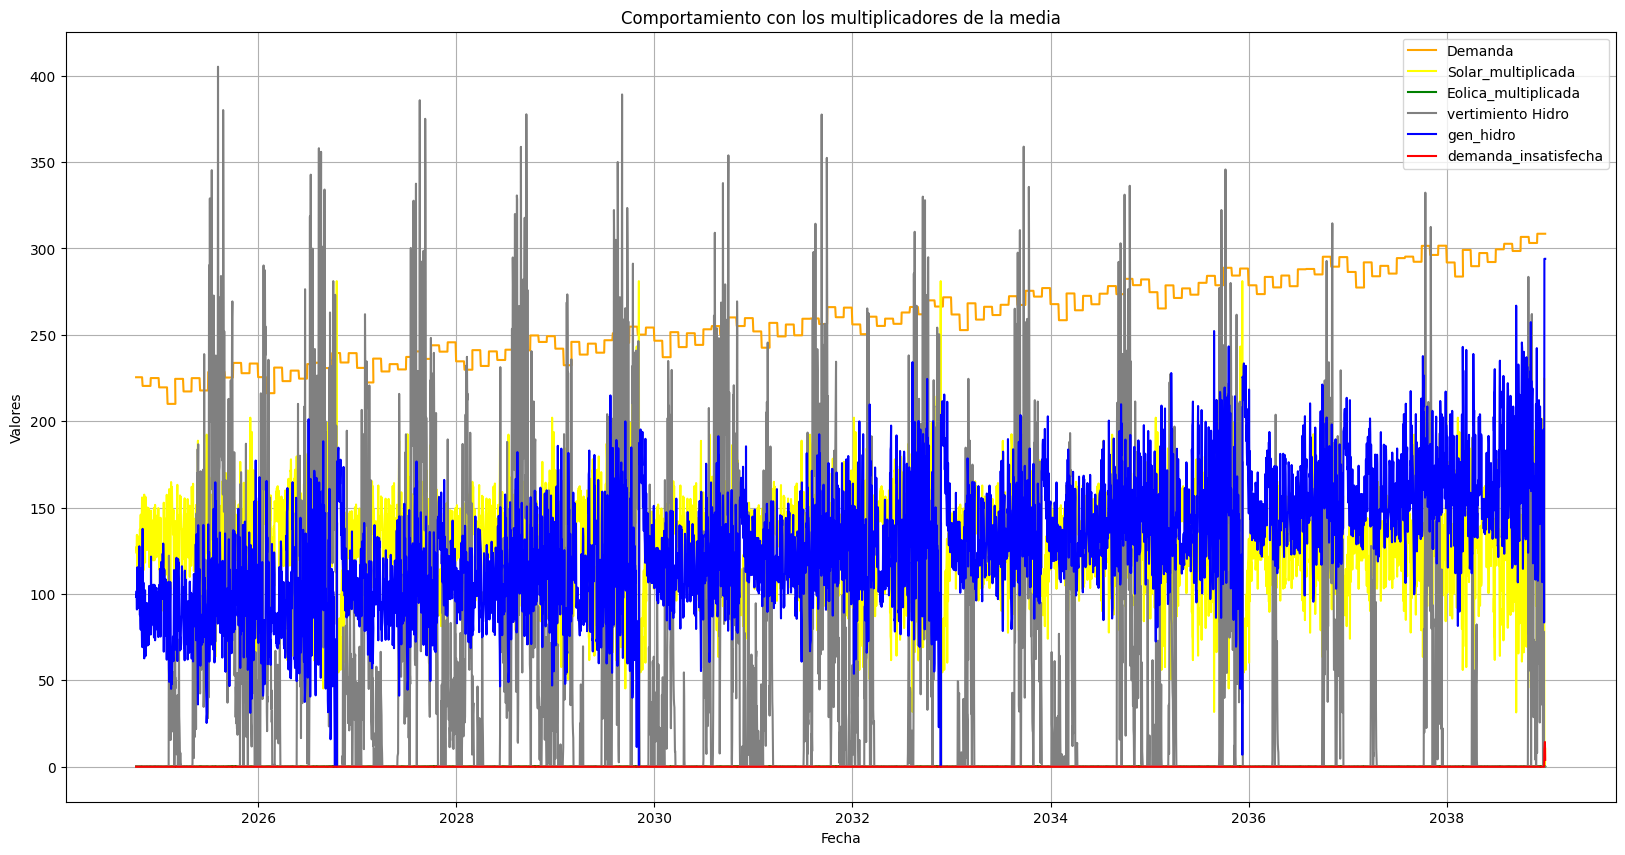

In [64]:
plt.figure(figsize=(20, 10))

plt.plot(df_constantes['Fecha'], df_constantes['Demanda'], label='Demanda', color='orange')
plt.plot(df_constantes['Fecha'], df_constantes['Solar_multiplicada'], label='Solar_multiplicada', color='yellow')
plt.plot(df_constantes['Fecha'], df_constantes['Eolica_multiplicada'], label='Eolica_multiplicada', color='green')
plt.plot(df_constantes['Fecha'], df_constantes['vertimiento'], label='vertimiento Hidro', color='gray')
plt.plot(df_constantes['Fecha'], df_constantes['gen_hidro'], label='gen_hidro', color='blue')
plt.plot(df_constantes['Fecha'], df_constantes['demanda_insatisfecha'], label='demanda_insatisfecha', color='red')

plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Comportamiento con los multiplicadores de la media')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

La media plantea unas condiciones mas equilibrados

## Prueba Diferentes Escenarios

In [65]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
df_constantes = df.copy()
df_constantes

,Fecha,IC Inferior 95%,IC Inferior 68%,Demanda,IC Superior 68%,IC Superior 95%,Solar,Eolica,Aportes,Eolica_NT,Solar_NT
0,2024-10-08,216.161980,220.344643,225.451938,230.588036,234.798115,0.447,0.073454,115.88,0.003776,-0.029919
1,2024-10-09,216.161980,220.344643,225.451938,230.588036,234.798115,0.441,0.076964,147.79,0.007681,-0.037197
2,2024-10-10,216.161980,220.344643,225.451938,230.588036,234.798115,0.428,0.093008,132.29,0.024121,-0.051461
3,2024-10-11,216.161980,220.344643,225.451938,230.588036,234.798115,0.498,0.087883,117.98,0.019392,0.017290
4,2024-10-12,216.161980,220.344643,225.451938,230.588036,234.798115,0.367,0.106744,120.19,0.038649,-0.114945
...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,253.617252,278.090932,308.516228,339.778510,365.049966,1.863,0.216441,146.06,0.034800,0.599348
5119,2038-12-27,253.617252,278.090932,308.516228,339.778510,365.049966,0.447,0.264424,141.27,0.083331,-0.819862
5120,2038-12-28,253.617252,278.090932,308.516228,339.778510,365.049966,0.441,0.230853,129.85,0.050308,-0.829050
5121,2038-12-29,253.617252,278.090932,308.516228,339.778510,365.049966,0.428,0.177788,133.95,-0.002210,-0.845217


In [66]:
# Define los multiplicadores constantes
x = 110
y = 1

In [67]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
# Ensure 'Solar_NT' and 'Eolica_NT' and 'Demanda' columns are included
df_constantes = df_nt[['Fecha', 'Solar', 'Eolica', 'Solar_NT', 'Eolica_NT', 'Aportes', 'Demanda']].copy()


df_constantes['Solar_multiplicada'] = df_nt['Solar_NT'] * x
df_constantes['Eolica_multiplicada'] = df_nt['Eolica_NT'] * y
df_constantes.head(3)

,Fecha,Solar,Eolica,Solar_NT,Eolica_NT,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada
0,2024-10-08,0.447,0.073454,0.815299,0.193592,115.88,225.451938,89.682925,0.193592
1,2024-10-09,0.441,0.076964,0.808021,0.197498,147.79,225.451938,88.882343,0.197498
2,2024-10-10,0.428,0.093008,0.793757,0.213937,132.29,225.451938,87.313309,0.213937


In [68]:
capacidad_maxima_embalse_1 = capacidad_maxima_embalse
nivel_anterior = nivel_inicial
df_constantes['nivel'] = 0
df_constantes['vertimiento'] = 0
df_constantes['gen_hidro'] = 0
df_constantes['demanda_insatisfecha'] = 0


In [69]:
# Itera sobre las filas de df_constantes para calcular los valores
for i in range(len(df_constantes)):
    # Calcula el nivel potencial
    nivel_potencial = nivel_anterior + df_constantes.loc[i, 'Aportes']

    # Calcula el vertimiento si el nivel potencial supera la capacidad máxima
    df_constantes.loc[i, 'vertimiento'] = max(0, nivel_potencial - capacidad_maxima_embalse)

    # Calcula el nivel actual, teniendo en cuenta el vertimiento
    df_constantes.loc[i, 'nivel'] = nivel_potencial - df_constantes.loc[i, 'vertimiento']

   # Calcula la demanda restante después de la generación solar y eólica
    demanda_restante = df_constantes.loc[i, 'Demanda'] - (df_constantes.loc[i, 'Solar_multiplicada'] + df_constantes.loc[i, 'Eolica_multiplicada'])

    # Calcula gen_hidro, limitada por el nivel actual y la demanda restante
    df_constantes.loc[i, 'gen_hidro'] = max(min(demanda_restante, df_constantes.loc[i, 'nivel'],294),0)

    # Calcula demanda_insatisfecha
    df_constantes.loc[i, 'demanda_insatisfecha'] = max(0, demanda_restante - df_constantes.loc[i, 'gen_hidro'])

    # Actualiza nivel_anterior para la siguiente iteración
    nivel_anterior = df_constantes.loc[i, 'nivel']-df_constantes.loc[i, 'gen_hidro']

df_constantes


C:\Users\josal\AppData\Local\Temp\ipykernel_16036\1773094211.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '815.88' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_constantes.loc[i, 'nivel'] = nivel_potencial - df_constantes.loc[i, 'vertimiento']
C:\Users\josal\AppData\Local\Temp\ipykernel_16036\1773094211.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '135.5754206657395' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_constantes.loc[i, 'gen_hidro'] = max(min(demanda_restante, df_constantes.loc[i, 'nivel'],294),0)
C:\Users\josal\AppData\Local\Temp\ipykernel_16036\1773094211.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.24033038394191' 

,Fecha,Solar,Eolica,Solar_NT,Eolica_NT,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada,nivel,vertimiento,gen_hidro,demanda_insatisfecha
0,2024-10-08,0.447,0.073454,0.815299,0.193592,115.88,225.451938,89.682925,0.193592,815.880000,0.0,135.575421,0.000000
1,2024-10-09,0.441,0.076964,0.808021,0.197498,147.79,225.451938,88.882343,0.197498,828.094579,0.0,136.372098,0.000000
2,2024-10-10,0.428,0.093008,0.793757,0.213937,132.29,225.451938,87.313309,0.213937,824.012482,0.0,137.924692,0.000000
3,2024-10-11,0.498,0.087883,0.862508,0.209208,117.98,225.451938,94.875861,0.209208,804.067789,0.0,130.366869,0.000000
4,2024-10-12,0.367,0.106744,0.730273,0.228466,120.19,225.451938,80.330039,0.228466,793.890921,0.0,144.893433,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,2038-12-26,1.863,0.216441,1.444566,0.224617,146.06,308.516228,158.902212,0.224617,6386.555840,0.0,149.389400,0.000000
5119,2038-12-27,0.447,0.264424,0.025356,0.273147,141.27,308.516228,2.789188,0.273147,6378.436439,0.0,294.000000,11.453893
5120,2038-12-28,0.441,0.230853,0.016168,0.240124,129.85,308.516228,1.778456,0.240124,6214.286439,0.0,294.000000,12.497648
5121,2038-12-29,0.428,0.177788,0.000001,0.187606,133.95,308.516228,0.000110,0.187606,6054.236439,0.0,294.000000,14.328512


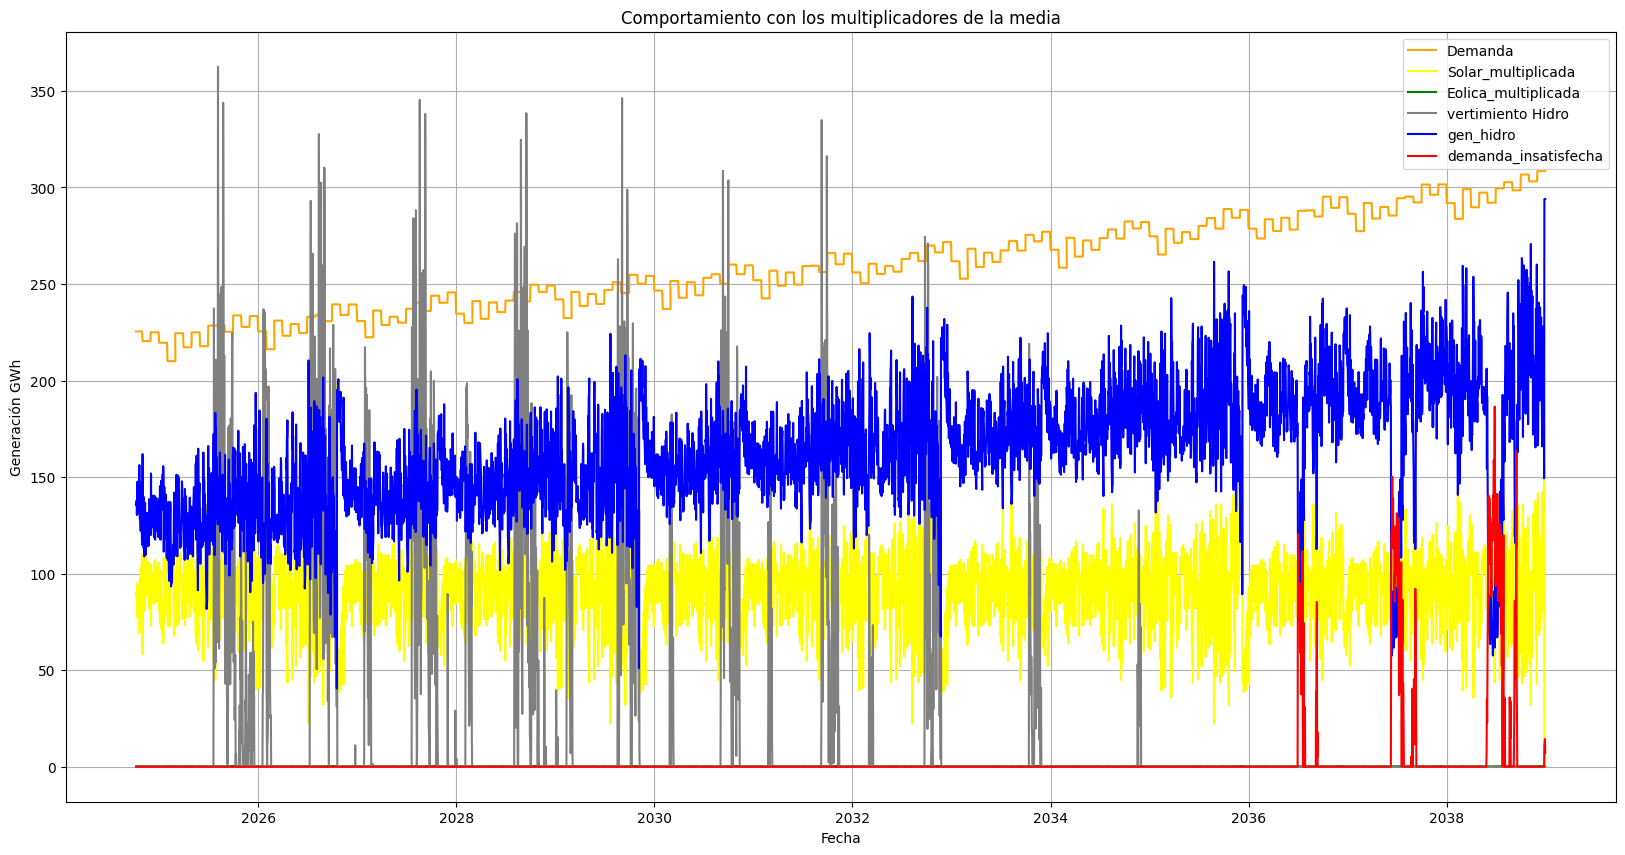

In [70]:
plt.figure(figsize=(20, 10))

plt.plot(df_constantes['Fecha'], df_constantes['Demanda'], label='Demanda', color='orange')
plt.plot(df_constantes['Fecha'], df_constantes['Solar_multiplicada'], label='Solar_multiplicada', color='yellow')
plt.plot(df_constantes['Fecha'], df_constantes['Eolica_multiplicada'], label='Eolica_multiplicada', color='green')
plt.plot(df_constantes['Fecha'], df_constantes['vertimiento'], label='vertimiento Hidro', color='gray')
plt.plot(df_constantes['Fecha'], df_constantes['gen_hidro'], label='gen_hidro', color='blue')
plt.plot(df_constantes['Fecha'], df_constantes['demanda_insatisfecha'], label='demanda_insatisfecha', color='red')

plt.xlabel('Fecha')
plt.ylabel('Generación GWh')
plt.title('Comportamiento con los multiplicadores de la media')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

Se busco un enfoque en el que no hubieran tantos vertimientos, pero sacrifcando unos momentos de demanda insatisfecha

# Analisis de confiabilidad

## Condicion actual

In [71]:
# Si la columna 'Fecha' está como índice y quieres que sea columna normal
df2.reset_index(inplace=True)

# También puedes renombrar columnas si están mal
df2.columns = ["Fecha", "Solar", "Hidraulica", "Eolica", "Aportes", "Demanda"]

# Mostrar el DataFrame limpio
df2

,Fecha,Solar,Hidraulica,Eolica,Aportes,Demanda
0,2020-08-07,0.447223,149.556873,0.073454,115.88,187.931174
1,2020-08-08,0.440522,141.094959,0.076964,147.79,189.196517
2,2020-08-09,0.428340,127.283621,0.093008,132.29,177.848896
3,2020-08-10,0.498157,151.778356,0.087883,117.98,201.237077
4,2020-08-11,0.367234,153.521478,0.106744,120.19,204.685689
...,...,...,...,...,...,...
1542,2024-10-27,9.288819,132.229379,0.628018,181.03,211.935321
1543,2024-10-28,8.865208,123.486983,0.581910,147.18,233.156691
1544,2024-10-29,9.395075,119.932874,0.476188,122.30,236.845491
1545,2024-10-30,9.700720,112.134006,0.422351,127.11,235.945042


In [72]:
df_constantes = df2.copy()
df_constantes

,Fecha,Solar,Hidraulica,Eolica,Aportes,Demanda
0,2020-08-07,0.447223,149.556873,0.073454,115.88,187.931174
1,2020-08-08,0.440522,141.094959,0.076964,147.79,189.196517
2,2020-08-09,0.428340,127.283621,0.093008,132.29,177.848896
3,2020-08-10,0.498157,151.778356,0.087883,117.98,201.237077
4,2020-08-11,0.367234,153.521478,0.106744,120.19,204.685689
...,...,...,...,...,...,...
1542,2024-10-27,9.288819,132.229379,0.628018,181.03,211.935321
1543,2024-10-28,8.865208,123.486983,0.581910,147.18,233.156691
1544,2024-10-29,9.395075,119.932874,0.476188,122.30,236.845491
1545,2024-10-30,9.700720,112.134006,0.422351,127.11,235.945042


In [74]:
# Crear un nuevo DataFrame para almacenar los resultados de la simulación con multiplicadores constantes
# Ensure 'Solar_NT' and 'Eolica_NT' and 'Demanda' columns are included
df_constantes = df2[['Fecha', 'Solar', 'Eolica', 'Aportes', 'Demanda']].copy()

In [75]:
df_constantes['Solar_multiplicada'] = df_constantes['Solar']
df_constantes['Eolica_multiplicada'] = df_constantes['Eolica']


In [76]:
# Itera sobre las filas de df_constantes para calcular los valores
for i in range(len(df_constantes)):
    # Calcula el nivel potencial
    nivel_potencial = nivel_anterior + df_constantes.loc[i, 'Aportes']

    # Calcula el vertimiento si el nivel potencial supera la capacidad máxima
    df_constantes.loc[i, 'vertimiento'] = max(0, nivel_potencial - capacidad_maxima_embalse_1)

    # Calcula el nivel actual, teniendo en cuenta el vertimiento
    df_constantes.loc[i, 'nivel'] = nivel_potencial - df_constantes.loc[i, 'vertimiento']

   # Calcula la demanda restante después de la generación solar y eólica
    demanda_restante = df_constantes.loc[i, 'Demanda'] - (df_constantes.loc[i, 'Solar'] + df_constantes.loc[i, 'Eolica'])

    # Calcula gen_hidro, limitada por el nivel actual y la demanda restante
    df_constantes.loc[i, 'gen_hidro'] = min(demanda_restante, df_constantes.loc[i, 'nivel'])

    # Calcula demanda_insatisfecha
    df_constantes.loc[i, 'demanda_insatisfecha'] = max(0, demanda_restante - df_constantes.loc[i, 'gen_hidro'])

    # Actualiza nivel_anterior para la siguiente iteración
    nivel_anterior = df_constantes.loc[i, 'nivel']-df_constantes.loc[i, 'gen_hidro']

df_constantes

,Fecha,Solar,Eolica,Aportes,Demanda,Solar_multiplicada,Eolica_multiplicada,vertimiento,nivel,gen_hidro,demanda_insatisfecha
0,2020-08-07,0.447223,0.073454,115.88,187.931174,0.447223,0.073454,0.0,5697.996439,187.410497,0.000000
1,2020-08-08,0.440522,0.076964,147.79,189.196517,0.440522,0.076964,0.0,5658.375942,188.679031,0.000000
2,2020-08-09,0.428340,0.093008,132.29,177.848896,0.428340,0.093008,0.0,5601.986911,177.327548,0.000000
3,2020-08-10,0.498157,0.087883,117.98,201.237077,0.498157,0.087883,0.0,5542.639363,200.651037,0.000000
4,2020-08-11,0.367234,0.106744,120.19,204.685689,0.367234,0.106744,0.0,5462.178326,204.211711,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1542,2024-10-27,9.288819,0.628018,181.03,211.935321,9.288819,0.628018,0.0,181.030000,181.030000,20.988483
1543,2024-10-28,8.865208,0.581910,147.18,233.156691,8.865208,0.581910,0.0,147.180000,147.180000,76.529573
1544,2024-10-29,9.395075,0.476188,122.30,236.845491,9.395075,0.476188,0.0,122.300000,122.300000,104.674228
1545,2024-10-30,9.700720,0.422351,127.11,235.945042,9.700720,0.422351,0.0,127.110000,127.110000,98.711971


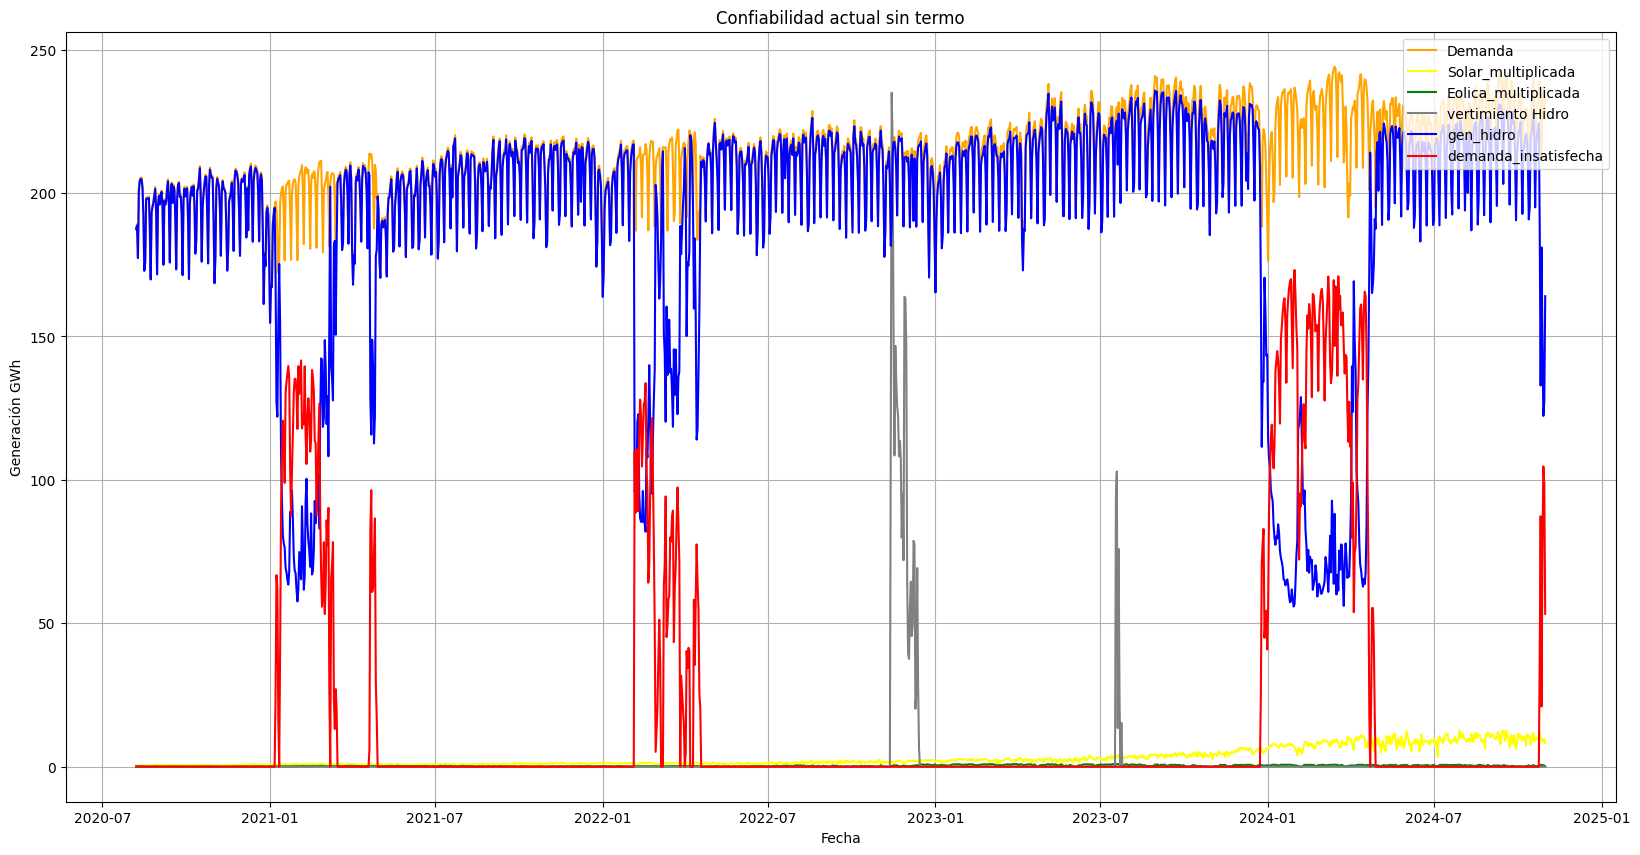

In [79]:
plt.figure(figsize=(20, 10))

plt.plot(df_constantes['Fecha'], df_constantes['Demanda'], label='Demanda', color='orange')
plt.plot(df_constantes['Fecha'], df_constantes['Solar_multiplicada'], label='Solar_multiplicada', color='yellow')
plt.plot(df_constantes['Fecha'], df_constantes['Eolica_multiplicada'], label='Eolica_multiplicada', color='green')
plt.plot(df_constantes['Fecha'], df_constantes['vertimiento'], label='vertimiento Hidro', color='gray')
plt.plot(df_constantes['Fecha'], df_constantes['gen_hidro'], label='gen_hidro', color='blue')
plt.plot(df_constantes['Fecha'], df_constantes['demanda_insatisfecha'], label='demanda_insatisfecha', color='red')
plt.xlabel('Fecha')
plt.ylabel('Generación GWh')
plt.title('Confiabilidad actual sin termo')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()
